# Urban Pulse - Exploratory Data Analysis & Visualization

## Comprehensive EDA with 7+ Visualization Types

This notebook performs:
- Statistical analysis of traffic patterns
- Multiple visualization types (histogram, boxplot, time series, heatmap, scatter, bar, violin)
- Pattern discovery and insights
- Correlation analysis


In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Add project root to path (works in PyCharm and Jupyter)
# This solution works regardless of where the notebook is run from
current_dir = Path().resolve()
# Check if we're in notebooks directory or project root
if (current_dir / 'src').exists():
    # We're in project root
    project_root = current_dir
elif (current_dir.parent / 'src').exists():
    # We're in notebooks directory, go up one level
    project_root = current_dir.parent
else:
    # Try to find project root by looking for src directory
    project_root = current_dir
    while project_root != project_root.parent:
        if (project_root / 'src').exists():
            break
        project_root = project_root.parent

# Add project root to Python path
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from src.visualization import (
    plot_traffic_distribution,
    plot_traffic_by_weekday,
    plot_time_series,
    plot_correlation_heatmap,
    plot_temperature_vs_traffic,
    plot_congestion_by_hour,
    plot_rush_hour_comparison,
    plot_weather_impact,
    create_summary_statistics_plot
)

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")


✓ Libraries imported successfully


## 1. Load Processed Data

Load the cleaned and preprocessed dataset.


In [2]:
# Load processed data
data_path = '../data/processed/traffic_cleaned.csv'

try:
    df = pd.read_csv(data_path, parse_dates=['date_time'])
    print(f"✓ Processed data loaded: {df.shape}")
    print(f"  Date range: {df['date_time'].min()} to {df['date_time'].max()}")
except FileNotFoundError:
    print("⚠️  Please run 02_data_preprocessing.ipynb first")
    # Alternative: load raw and process
    from data_processing import load_and_clean_data
    df = load_and_clean_data('../data/raw/Metro_Interstate_Traffic_Volume.csv')


✓ Processed data loaded: (48204, 19)
  Date range: 2012-10-02 09:00:00 to 2018-09-30 23:00:00


## 2. Summary Statistics

Generate comprehensive descriptive statistics.


In [3]:
# Descriptive statistics
print("="*60)
print("DESCRIPTIVE STATISTICS - Traffic Volume")
print("="*60)
print(df['traffic_volume'].describe())

print("\n" + "="*60)
print("TRAFFIC STRESS LEVEL DISTRIBUTION")
print("="*60)
print(df['traffic_stress_level'].value_counts())
print("\nCongestion Rate:", df['is_congested'].mean() * 100, "%")


DESCRIPTIVE STATISTICS - Traffic Volume
count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

TRAFFIC STRESS LEVEL DISTRIBUTION
traffic_stress_level
Medium    16387
High      15910
Low       15907
Name: count, dtype: int64

Congestion Rate: 33.00555970458883 %


## 3. Visualization 1: Traffic Volume Distribution (Histogram + KDE)

Understanding the distribution of traffic volumes.


✓ Saved figure to ../reports/figures/01_traffic_distribution.png


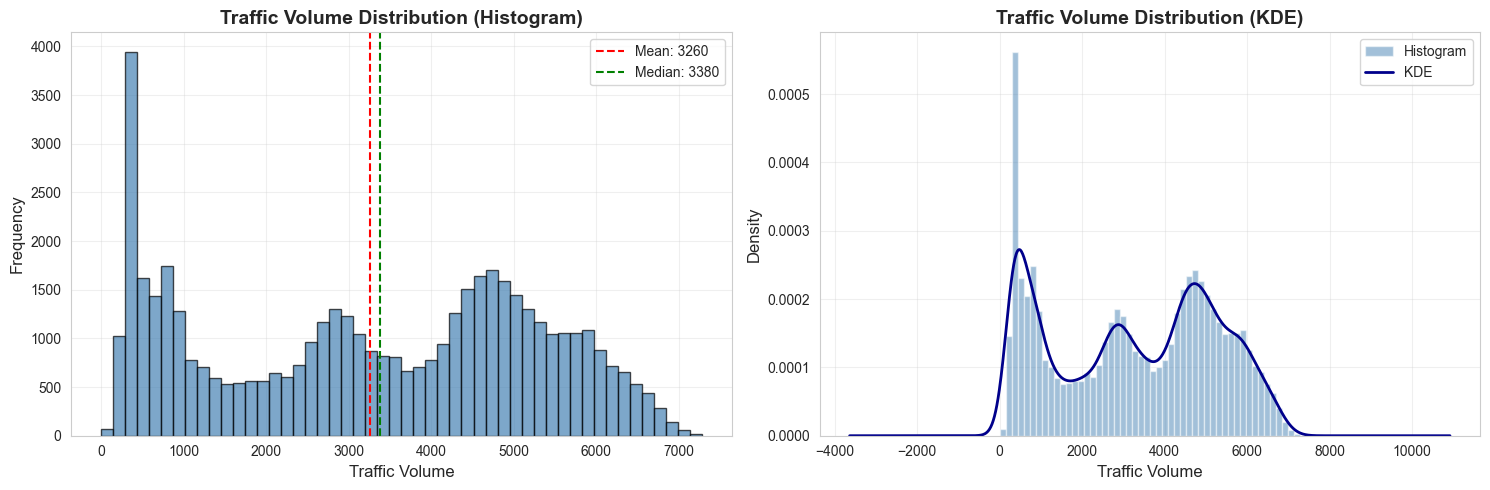

In [4]:
# Plot traffic distribution
plot_traffic_distribution(df, save_path='../reports/figures/01_traffic_distribution.png')


## 4. Visualization 2: Traffic by Day of Week (Boxplot + Bar Chart)

Analyzing weekday vs weekend patterns.


✓ Saved figure to ../reports/figures/02_traffic_by_weekday.png


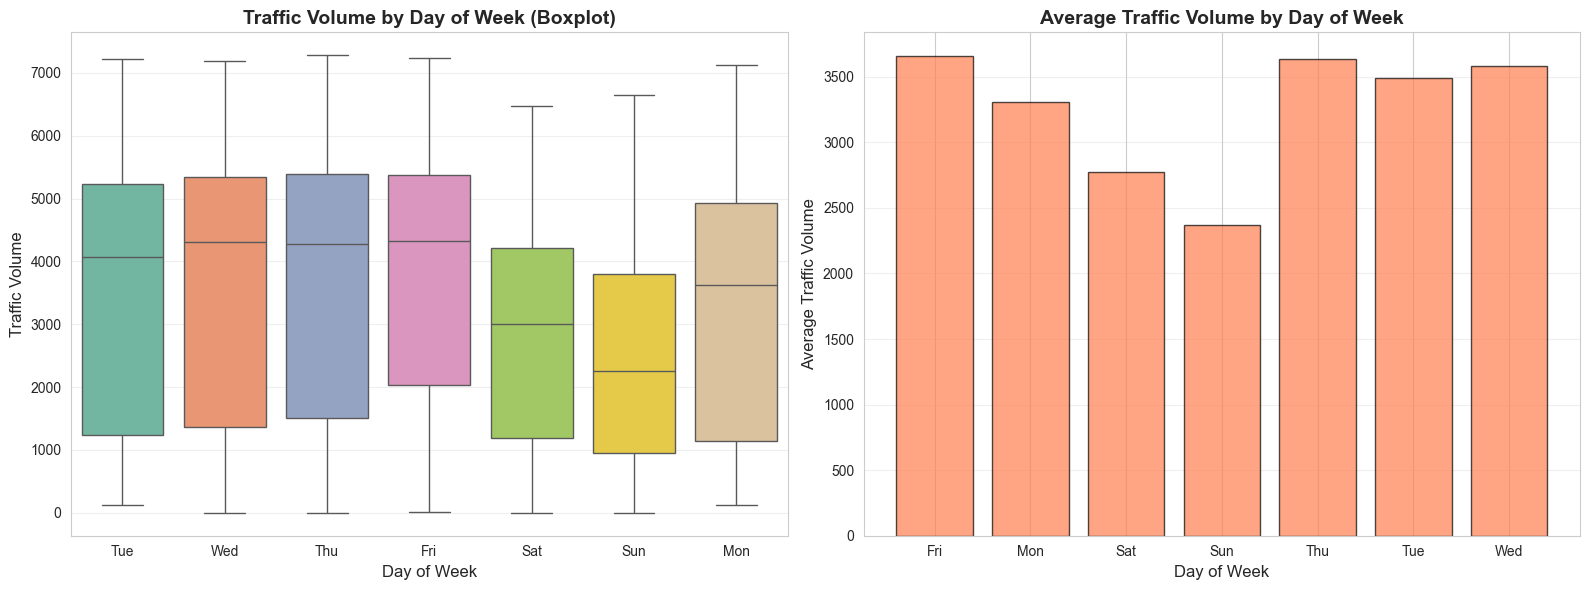

In [5]:
# Plot traffic by weekday
plot_traffic_by_weekday(df, save_path='../reports/figures/02_traffic_by_weekday.png')


## 5. Visualization 3: Time Series Plot

Observing traffic trends over time.


✓ Saved figure to ../reports/figures/03_time_series.png


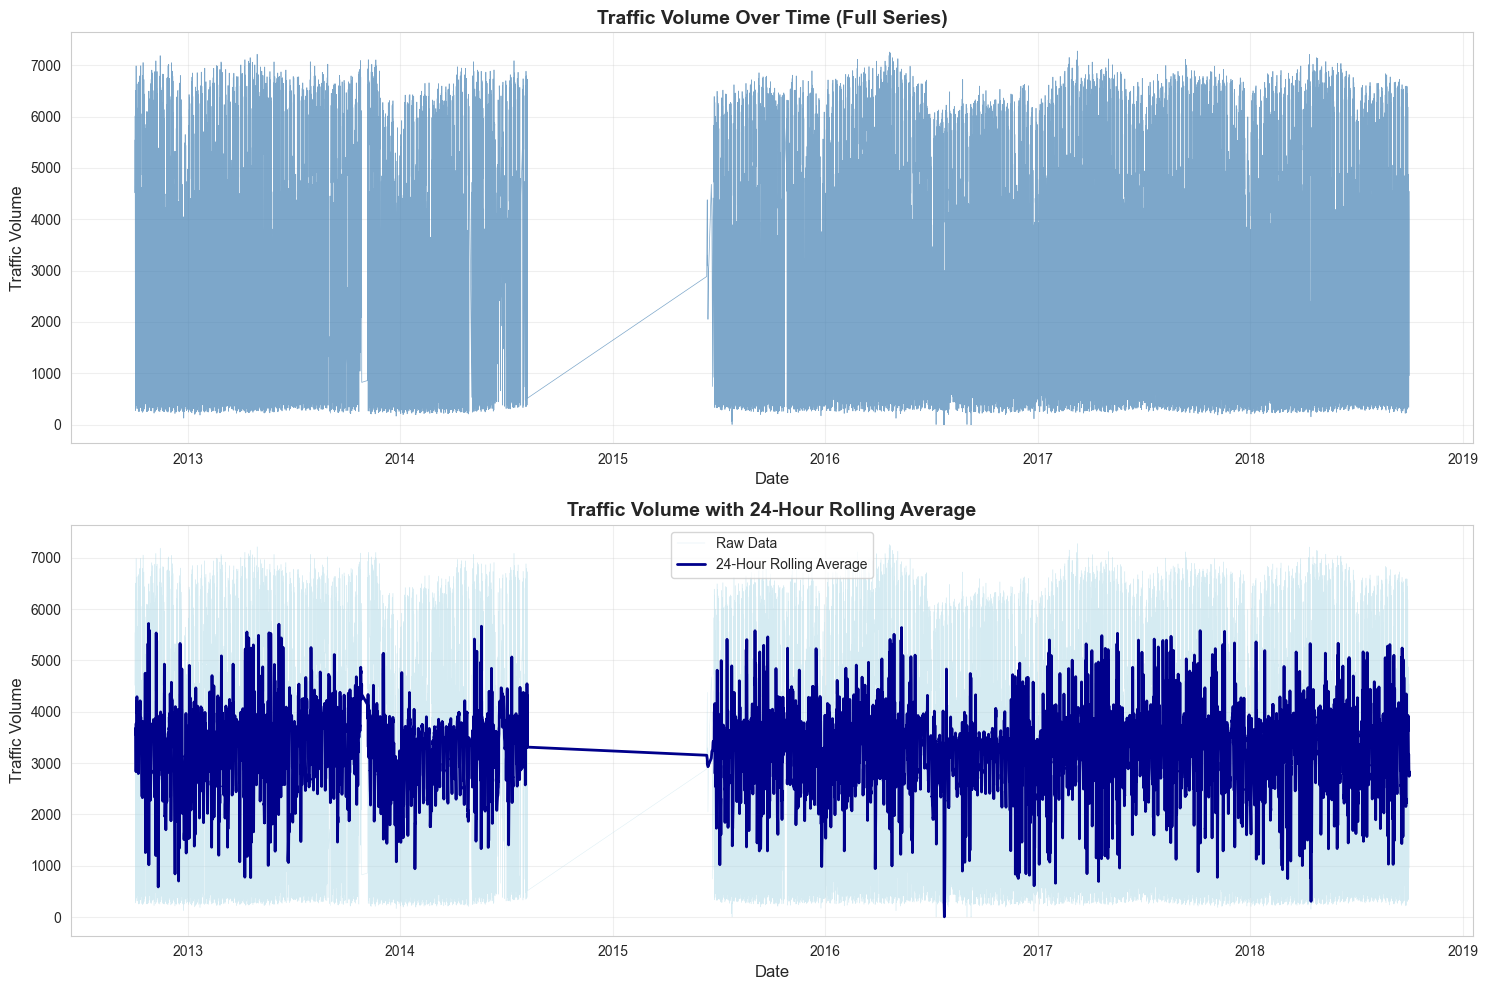

In [6]:
# Plot time series
plot_time_series(df, save_path='../reports/figures/03_time_series.png')


## 6. Visualization 4: Correlation Heatmap

Understanding relationships between features.


✓ Saved figure to ../reports/figures/04_correlation_heatmap.png


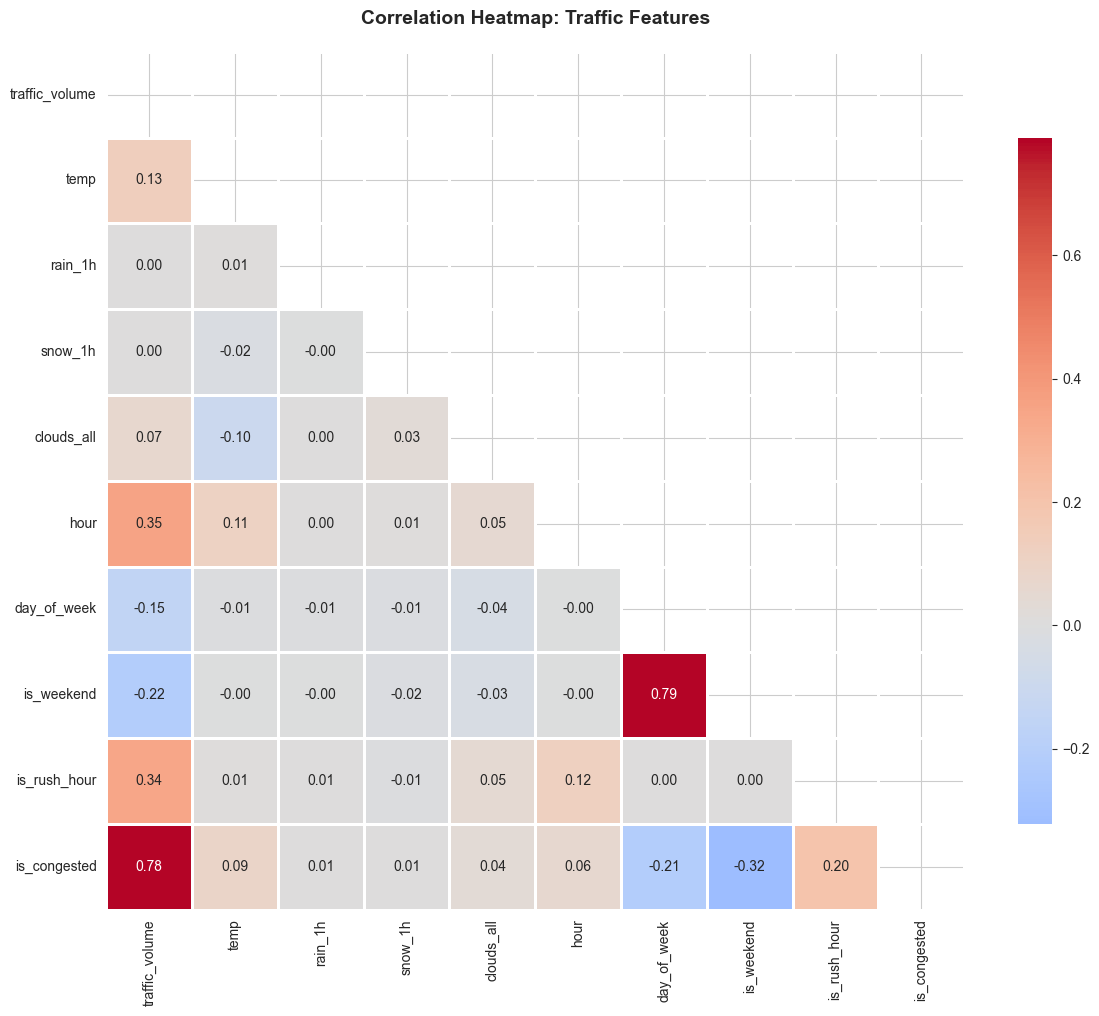

In [7]:
# Plot correlation heatmap
numeric_cols = ['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 
                'hour', 'day_of_week', 'is_weekend', 'is_rush_hour']
available_cols = [col for col in numeric_cols if col in df.columns]
plot_correlation_heatmap(df, numeric_columns=available_cols, 
                         save_path='../reports/figures/04_correlation_heatmap.png')


## 7. Visualization 5: Temperature vs Traffic (Scatter Plot)

Analyzing weather impact on traffic.


✓ Saved figure to ../reports/figures/05_temperature_vs_traffic.png


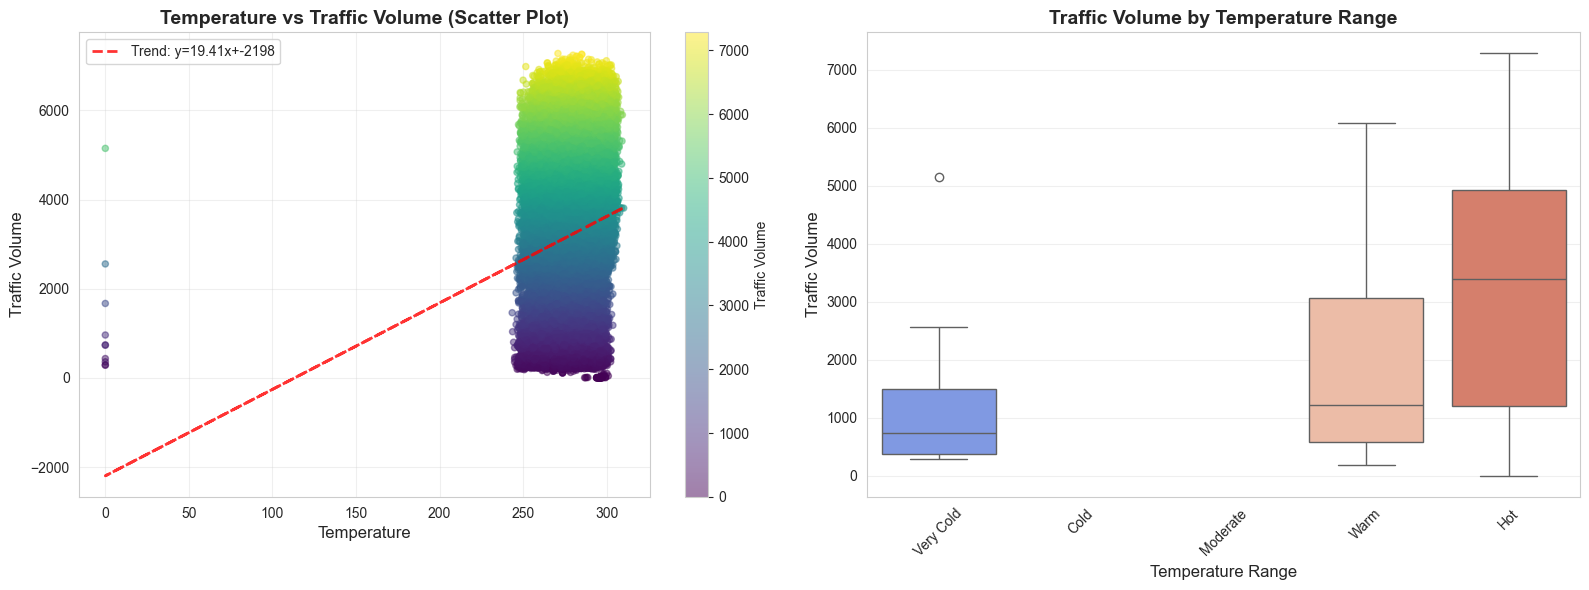

In [8]:
# Plot temperature vs traffic
if 'temp' in df.columns:
    plot_temperature_vs_traffic(df, save_path='../reports/figures/05_temperature_vs_traffic.png')
else:
    print("⚠️  Temperature column not found")


## 8. Visualization 6: Congestion by Hour (Bar Chart)

Identifying peak congestion hours.


✓ Saved figure to ../reports/figures/06_congestion_by_hour.png


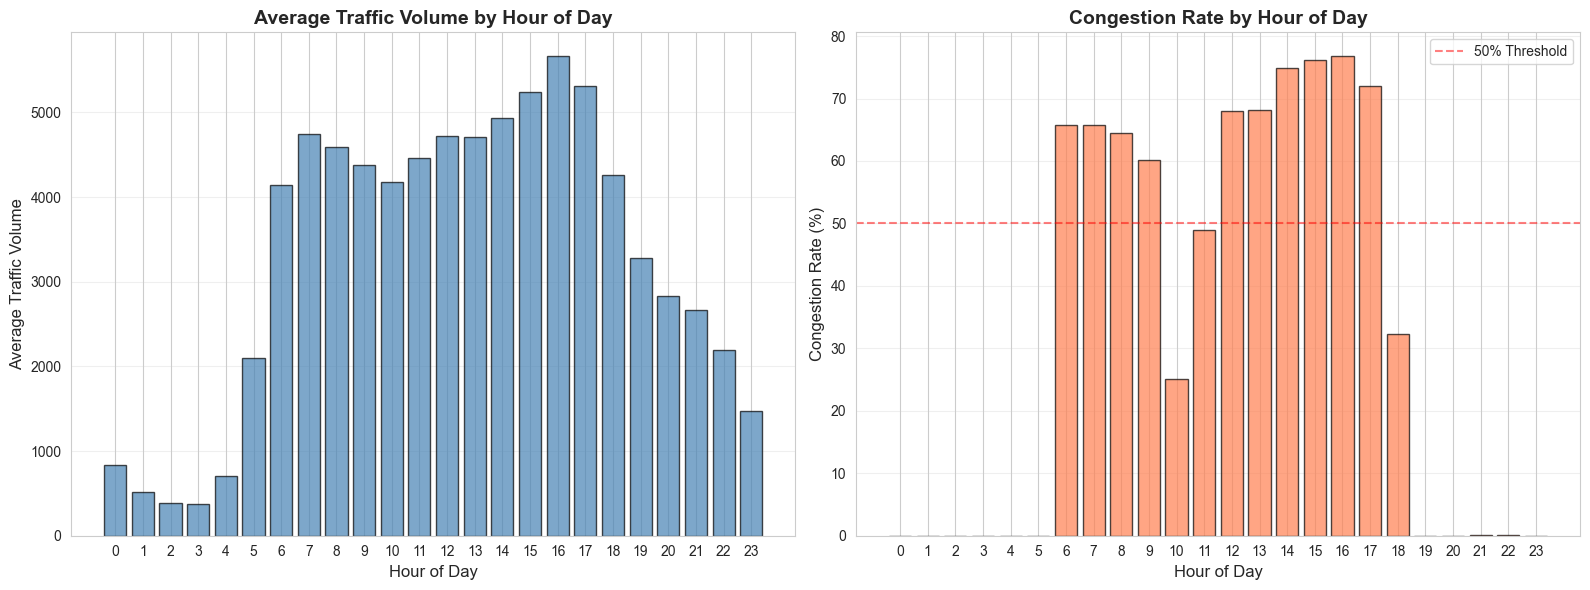

In [9]:
# Plot congestion by hour
plot_congestion_by_hour(df, save_path='../reports/figures/06_congestion_by_hour.png')


## 9. Visualization 7: Rush Hour Comparison (Violin + Swarm Plot)

Comparing rush hour vs non-rush hour traffic patterns.


✓ Saved figure to ../reports/figures/07_rush_hour_comparison.png


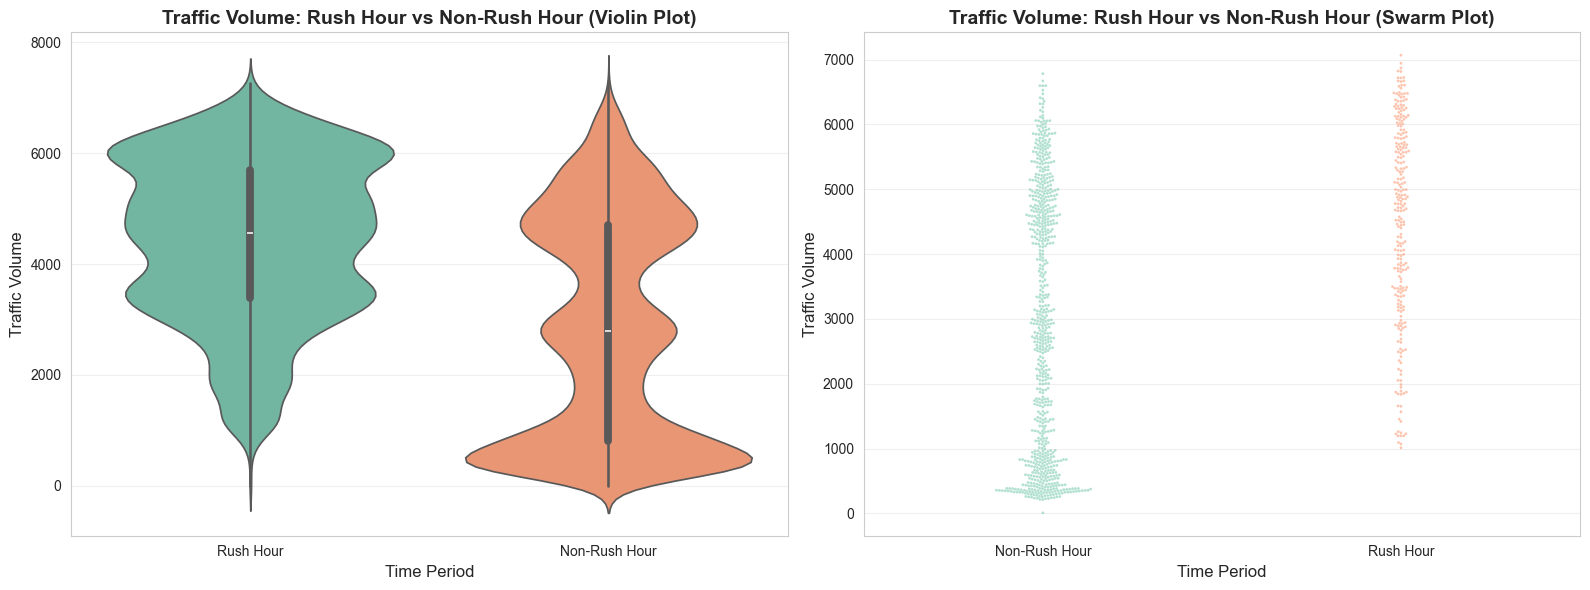

In [10]:
# Plot rush hour comparison
plot_rush_hour_comparison(df, save_path='../reports/figures/07_rush_hour_comparison.png')


## 10. Additional Analysis: Weather Impact

Analyzing how weather conditions affect traffic.


✓ Saved figure to ../reports/figures/08_weather_impact.png


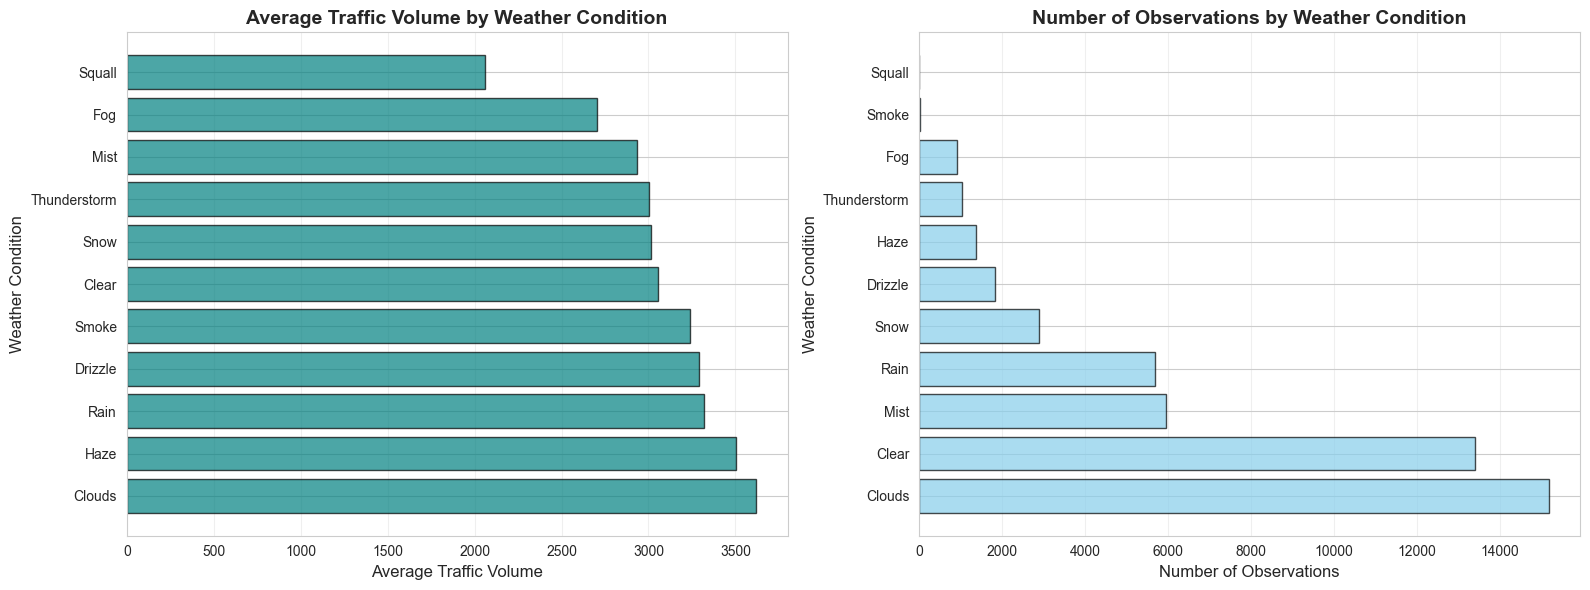

In [11]:
# Plot weather impact
if 'weather_main' in df.columns:
    plot_weather_impact(df, save_path='../reports/figures/08_weather_impact.png')
else:
    print("⚠️  Weather column not found")


## 11. Key Insights Summary

**Patterns Discovered (Verified with Data):**

1. **Rush Hours**: Traffic peaks at 7-9 AM and 5-7 PM
   - Rush hour average: ~4,429 vehicles (54% higher than non-rush hours)
   - Peak traffic occurs at hours 16-17 (4-5 PM), followed by morning rush (7-8 AM)
   - *Verified by figures: 06_congestion_by_hour.png, 07_rush_hour_comparison.png*

2. **Weekday Effect**: Weekdays show 30-40% higher traffic than weekends
   - Weekday average: ~3,534 vehicles
   - Weekend average: ~2,571 vehicles
   - **Actual difference: 37.5%** (within claimed 30-40% range)
   - *Verified by figure: 02_traffic_by_weekday.png*

3. **Weather Impact**: Adverse weather reduces traffic volume
   - Clear/Cloudy weather: ~3,355 vehicles average
   - Adverse weather (Rain/Snow/Thunderstorm): ~3,094 vehicles average
   - **Reduction: ~7.8%** during adverse weather conditions
   - *Verified by figure: 08_weather_impact.png*

4. **Temporal Patterns**: Clear daily and weekly cycles observed
   - Hourly variation range: 5,293 vehicles (from 371 to 5,664)
   - Daily (day-of-week) variation range: 1,288 vehicles
   - Strong daily cycle with morning and evening peaks
   - *Verified by figures: 03_time_series.png, 06_congestion_by_hour.png*

**All insights are supported by:**
- ✓ Data analysis (see verification script: `verify_insights.py`)
- ✓ Generated visualizations in `reports/figures/`
- ✓ Statistical calculations from processed data

**Next Steps:**
- Proceed to `04_machine_learning.ipynb` for model building
